In [126]:
import csv
import re
import json

'''
ex:
{
    "date": "1/1/2023",
    "weight": "180",
    "lifts": [
        {
            "exerciseName": "Deadlift",
            "sets": [
                {
                    "reps": 3,
                    "weight": 215"
                },
                {
                    "reps": 2,
                    "weight": 215"
                },
                {
                    "reps": 2,
                    "weight": 200"
                }
            ]
        }
    ]
}
'''
def extractDataIntoJSON():
    with open('weightliftingData.csv') as data:
        csvReader = csv.reader(data, delimiter=',')
        (DATE_COLUMN, WEIGHT_COLUMN, LIFT_1_COLUMN, LIFT_2_COLUMN, LIFT_3_COLUMN, LIFT_4_COLUMN, LIFT_5_COLUMN) = next(csvReader)

        dataList = []
        for row in csvReader:
            (DATE, WEIGHT, *LIFT) = row
            nonEmptyLifts = filter(lambda liftData: len(liftData) != 0, LIFT)
            rowEntry = dict()
            rowEntry["date"] = DATE
            rowEntry["weight"] = WEIGHT
            rowEntry["lifts"] = list(map(extractLiftInfo, nonEmptyLifts))
            dataList.append(rowEntry)
        #print(json.dumps(dataList))
        return dataList
        

def extractLiftInfo(rawString):
    nameVsSetPattern = r"^(\D*)\W(.*)$"
    nameVsSetMatch = re.search(nameVsSetPattern, rawString)
    exerciseName = nameVsSetMatch.group(1)
    setInfo = nameVsSetMatch.group(2)

    splitSetPattern = r"((\d+x\d+\W?){1,}-?\d+)\W?"
    splitSets = re.findall(splitSetPattern, setInfo)
    cleanSets = list(map(lambda set: set[0], splitSets))

    setVsWeightPattern = r"(.*)\W(\d+)$"
    for set in cleanSets:
        setWeightMatch = re.search(setVsWeightPattern, set)
        sets = setWeightMatch.group(1)
        weight = setWeightMatch.group(2)

        setPattern = r"(\d+)x(\d+)"
        setDataList = list(re.findall(setPattern, sets))

        listOfSets = []
        for entry in setDataList:
            numSets = int(entry[0])
            for i in range(numSets):
                listOfSets.append({"reps": entry[1], "weight": weight})
    return {
        "exerciseName": exerciseName,
        "sets": listOfSets
    }

In [127]:
liftingData = extractDataIntoJSON()

In [128]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from datetime import datetime

In [129]:
def convertDateStringToDate(dateString):
    return datetime.strptime(dateString, "%m/%d/%y")

In [130]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

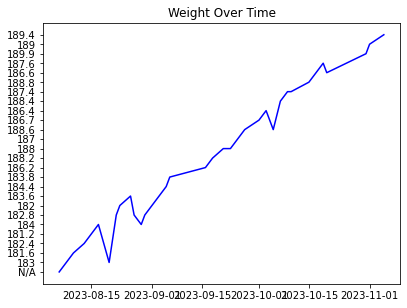

In [131]:
weightData = list(map(lambda x: x["weight"], liftingData))
dateData = list(map(lambda x: convertDateStringToDate(x["date"]), liftingData))

#print(weightData, dateData)
#print(len(weightData), len(dateData))

plt.title("Weight Over Time")
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(dateData, weightData, color='blue')

plt.show()